# Loan Default Prediction Analysis

## 1. Introduction

# Business Understanding

## Problem Statement
This project analyzes loan data to predict loan defaults and assess loan performance. Loan defaults represent a significant challenge for financial institutions, leading to financial losses and increased risk. By identifying patterns and factors that contribute to defaults, stakeholders can make informed decisions to mitigate risks.

## Stakeholders
1. **Financial Institutions**: Banks and lending organizations can use this analysis to improve their credit risk assessment processes.
2. **Loan Officers**: They can use the insights to make better lending decisions.
3. **Regulatory Bodies**: They can monitor and enforce compliance with lending regulations.

## Project Value
This project provides actionable insights into loan performance and default prediction, enabling stakeholders to:
- Identify high-risk loans early.
- Optimize lending strategies.
- Reduce financial losses due to defaults.

# 2. Data Understanding

## Data Source
The dataset used in this analysis is `Final_Loans_dataset.csv`, which contains loan-related information such as borrower demographics, credit scores, loan amounts, and repayment status. The data is sourced from a financial institution and includes both performing and non-performing loans.

## Dataset Properties
- **Size**: 1,048,575 rows and 19 columns.
- **Features**: Includes borrower information (e.g., age, gender, employment status), loan details (e.g., principal amount, EMI), and performance metrics (e.g., arrears, loan status).
- **Target Variable**: `LOAN_STATUS` (e.g., CURRENT, EXPIRED, AUTH) and `PRUDENTIAL_CLASSIFICATION` (e.g., NORMAL, DOUBTFUL).

## Relevance to the Problem
The dataset is suitable for this project because:
- It contains historical loan data, which is essential for predicting defaults.
- It includes features that are known to influence loan performance, such as credit scores and income levels.
- The target variables (`LOAN_STATUS` and `PRUDENTIAL_CLASSIFICATION`) align with the problem of identifying loan defaults.

## Limitations
- **Missing Values**: Many columns have a high percentage of missing values, which may require imputation or removal.
- **Data Quality**: Some columns (e.g., `AGE`, `EMI`) contain inconsistent or unrealistic values that need cleaning.

# Import Libraries

In [29]:
#Import libraries
#import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# For model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
# sns.set_palette("Set2")

# Display settings for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

## Load the dataset

In [30]:
#  reload the CSV with the low_memory=False parameter to properly handle the mixed data types:
df = pd.read_csv('../Data/Final_Loans_dataset.csv', low_memory=False)
print(f"Dataset dimensions: {df.shape}")

Dataset dimensions: (1048575, 19)


In [8]:
# Check basic information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   ID                         18197 non-null    float64
 1   GENDER                     17749 non-null    object 
 2   AGE                        1045120 non-null  object 
 3   NO_DEFAULT_LOAN            17922 non-null    float64
 4   EMPLOYMENT_STATUS          18197 non-null    object 
 5   SECTOR                     18070 non-null    object 
 6   MARITAL_STATUS             18197 non-null    object 
 7   CREDIT_SCORE               17922 non-null    float64
 8   SCOREGRADE                 17922 non-null    object 
 9   CRR                        18197 non-null    object 
 10  CURRENCY                   18197 non-null    object 
 11  NET INCOME                 17763 non-null    float64
 12  PRINCIPAL_AMOUNT           18197 non-null    float64
 13  EMI         

In [9]:
# Check the first few rows with more readable output
print(df.head().to_string())

         ID  GENDER AGE  NO_DEFAULT_LOAN EMPLOYMENT_STATUS                     SECTOR MARITAL_STATUS  CREDIT_SCORE SCOREGRADE  CRR CURRENCY  NET INCOME  PRINCIPAL_AMOUNT        EMI  OD_DAYS PRUDENTIAL_CLASSIFICATION RISK_GRADE      AREARS LOAN_STATUS
0  209801.0  FEMALE  37              7.0          EMPLOYED        FINANCE & INSURANCE        MARRIED         615.0         II  B10      KES     5000.00         642000.00  59,826.37    204.0                  DOUBTFUL         B9  453,208.12     CURRENT
1  315048.0    MALE  41              3.0     SELF-EMPLOYED                        NaN        MARRIED         529.0         JJ  B20      KES        0.00          78000.00   6,149.03    295.0                  DOUBTFUL         B9   68,917.29     EXPIRED
2  145878.0    MALE  36              6.0          EMPLOYED  TRANSPORT & COMMUNICATION        MARRIED         665.0         FF   A5      KES  1294783.78          80000.00   7,439.02      0.0                    NORMAL      A1-A6        4.84     CURR

In [10]:
# Get descriptive statistics
df.describe(include='all')

,ID,GENDER,AGE,NO_DEFAULT_LOAN,EMPLOYMENT_STATUS,SECTOR,MARITAL_STATUS,CREDIT_SCORE,SCOREGRADE,CRR,CURRENCY,NET INCOME,PRINCIPAL_AMOUNT,EMI,OD_DAYS,PRUDENTIAL_CLASSIFICATION,RISK_GRADE,AREARS,LOAN_STATUS
count,18197.000000,17749,1045120,17922.000000,18197,18070,18197,17922.000000,17922,18197,18197,1.776300e+04,1.819700e+04,18197,18197.000000,18197,18197,18197,18197
unique,NaN,3,69,NaN,7,21,8,NaN,11,10,1,NaN,NaN,11618,NaN,4,4,3920,3
top,NaN,FEMALE,0,NaN,EMPLOYED,BUSINESS SERVICES,MARRIED,NaN,AA,A5,KES,NaN,NaN,"7,101.24",NaN,NORMAL,A1-A6,0,CURRENT
freq,NaN,6779,1026923,NaN,9415,3272,8296,NaN,2656,16508,18197,NaN,NaN,141,NaN,17033,17033,14202,17562
mean,253786.591251,NaN,NaN,1.045140,NaN,NaN,NaN,668.168173,NaN,NaN,NaN,2.770398e+06,1.985260e+05,NaN,9.487113,NaN,NaN,NaN,NaN
std,142327.521201,NaN,NaN,1.593513,NaN,NaN,NaN,73.684555,NaN,NaN,NaN,5.592659e+06,2.508231e+05,NaN,38.744496,NaN,NaN,NaN,NaN
min,10010.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,1.000000e+03,NaN,0.000000,NaN,NaN,NaN,NaN
25%,128681.000000,NaN,NaN,0.000000,NaN,NaN,NaN,618.000000,NaN,NaN,NaN,4.262711e+05,1.800000e+04,NaN,0.000000,NaN,NaN,NaN,NaN
50%,253214.000000,NaN,NaN,0.000000,NaN,NaN,NaN,665.000000,NaN,NaN,NaN,1.123325e+06,1.000000e+05,NaN,0.000000,NaN,NaN,NaN,NaN
75%,376726.000000,NaN,NaN,2.000000,NaN,NaN,NaN,720.000000,NaN,NaN,NaN,2.820720e+06,2.805131e+05,NaN,0.000000,NaN,NaN,NaN,NaN


# 3. Data Preparation

## Handling Missing Values
- Rows with fewer than 5 non-null values were dropped to ensure data quality.
- Missing values in categorical columns (e.g., `GENDER`, `EMPLOYMENT_STATUS`) were replaced with `NaN` for consistency.

## Cleaning Data
- **EMI and AREARS**: Converted from string to float by removing commas.
- **AGE**: Converted to numeric and replaced unrealistic values (e.g., 0) with `NaN`.
- **Categorical Columns**: Converted to uppercase for consistency.

## Feature Engineering
- **Debt-to-Income Ratio**: Created a new feature (`DEBT_TO_INCOME`) to measure the borrower's ability to repay loans.
- **Age Groups**: Categorized borrowers into age groups (e.g., 18-25, 26-35) for better analysis.
- **Loan Performance**: Created a new feature (`LOAN_PERFORMANCE`) to classify loans as PERFORMING, LATE, DELINQUENT, or DEFAULT based on overdue days (`OD_DAYS`).

## Justification
- **Handling Missing Values**: Ensures the dataset is clean and suitable for analysis.
- **Feature Engineering**: Adds meaningful features that are relevant to loan performance and default prediction.

In [31]:
# Count missing values in each column
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
ID                           1030378
GENDER                       1030826
AGE                             3455
NO_DEFAULT_LOAN              1030653
EMPLOYMENT_STATUS            1030378
SECTOR                       1030505
MARITAL_STATUS               1030378
CREDIT_SCORE                 1030653
SCOREGRADE                   1030653
CRR                          1030378
CURRENCY                     1030378
NET INCOME                   1030812
PRINCIPAL_AMOUNT             1030378
EMI                          1030378
OD_DAYS                      1030378
PRUDENTIAL_CLASSIFICATION    1030378
RISK_GRADE                   1030378
AREARS                       1030378
LOAN_STATUS                  1030378
dtype: int64


In [32]:
# calculate percentage of missing values
missing_percentage = (missing_values / len(df)) * 100
print("\nPercentage of missing values per column:")
print(missing_percentage)


Percentage of missing values per column:
ID                           98.264597
GENDER                       98.307322
AGE                           0.329495
NO_DEFAULT_LOAN              98.290823
EMPLOYMENT_STATUS            98.264597
SECTOR                       98.276709
MARITAL_STATUS               98.264597
CREDIT_SCORE                 98.290823
SCOREGRADE                   98.290823
CRR                          98.264597
CURRENCY                     98.264597
NET INCOME                   98.305987
PRINCIPAL_AMOUNT             98.264597
EMI                          98.264597
OD_DAYS                      98.264597
PRUDENTIAL_CLASSIFICATION    98.264597
RISK_GRADE                   98.264597
AREARS                       98.264597
LOAN_STATUS                  98.264597
dtype: float64


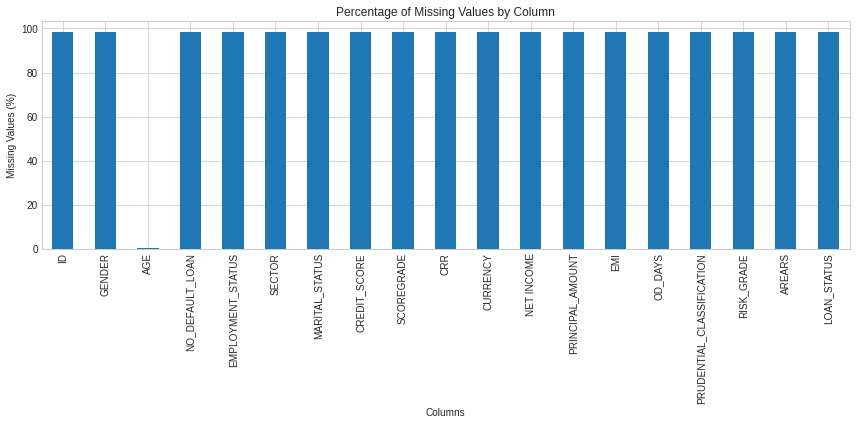

In [33]:
# Plot missing values 
plt.figure(figsize=(12, 6))
missing_percentage.plot(kind='bar')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Missing Values (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [34]:
# Remove rows where all or most columns are NaN
df_clean = df.dropna(thresh=5)  # Keep rows with at least 5 non-null values
print(f"Original shape: {df.shape}, New shape: {df_clean.shape}")

Original shape: (1048575, 19), New shape: (18197, 19)


## Data Cleaning

In [35]:
# Convert EMI and AREARS columns from string to float (removing commas)
df_clean.loc[:, 'EMI'] = df_clean['EMI'].str.replace(',', '').astype(float)
df_clean.loc[:, 'AREARS'] = df_clean['AREARS'].str.replace(',', '').astype(float)

In [36]:
# Replace "0" with NaN in categorical columns where "0" is not a valid category
categorical_cols = ['GENDER', 'EMPLOYMENT_STATUS', 'MARITAL_STATUS']
for col in categorical_cols:
    df_clean.loc[:, col] = df_clean[col].replace("0", np.nan)

In [37]:
# Convert AGE to numeric and replace unrealistic values (like 0) with NaN
df_clean.loc[:, 'AGE'] = pd.to_numeric(df_clean['AGE'], errors='coerce')
df_clean.loc[:, 'AGE'] = df_clean['AGE'].apply(lambda x: np.nan if x == 0 or x < 18 or x > 100 else x)

In [41]:
# Convert text columns to uppercase for consistency
for col in df_clean.select_dtypes(include=['object']).columns:
    df_clean.loc[:, col] = df_clean[col].str.upper() if hasattr(df_clean[col], 'str') else df_clean[col]

In [39]:
# Check unique values in categorical columns
for col in ['GENDER', 'EMPLOYMENT_STATUS', 'SECTOR', 'MARITAL_STATUS', 'SCOREGRADE', 'CRR', 'PRUDENTIAL_CLASSIFICATION', 'RISK_GRADE', 'LOAN_STATUS']:
    print(f"\nUnique values in {col}:")
    print(df_clean[col].value_counts())


Unique values in GENDER:
GENDER
FEMALE    6779
MALE      5854
Name: count, dtype: int64

Unique values in EMPLOYMENT_STATUS:
EMPLOYMENT_STATUS
EMPLOYED         9415
SELF-EMPLOYED    5930
OTHER             275
STUDENT            42
RETIRED            14
UNEMPLOYED         13
Name: count, dtype: int64

Unique values in SECTOR:
SECTOR
BUSINESS SERVICES                      3272
INDIVIDUALS                            2520
SOCIAL, COMMUNITY & PERSONAL SERVIC    2285
WHOLESALE AND RETAIL TRADE             1935
TRANSPORT & COMMUNICATION              1816
MANUFACTURING & PROCESSING             1553
FINANCE & INSURANCE                     764
AGRICULTURE                             731
TOURISM & HOSPITALITY                   653
BUILDING & CONSTRUCTION                 600
NON PROFIT INSTITUTIONS                 520
GOVERNMENT                              326
PROFESSIONAL SERVICES                   267
REAL ESTATE                             256
PETROLEUM & NATURAL GAS                 156
ELECT

## Feature Engineering

In [43]:
# Replace zero or NaN values in 'NET INCOME' with NaN to avoid division by zero
df_clean.loc[:, 'DEBT_TO_INCOME'] = df_clean['EMI'] / df_clean['NET INCOME'].replace(0, np.nan)


In [44]:
# Handle infinite values in DEBT_TO_INCOME
df_clean.loc[:, 'DEBT_TO_INCOME'] = df_clean['DEBT_TO_INCOME'].replace([np.inf, -np.inf], np.nan)

In [45]:
# Create age groups
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df_clean.loc[:, 'AGE_GROUP'] = pd.cut(df_clean['AGE'], bins=bins, labels=labels)

In [46]:
# Create binary default indicator
df_clean.loc[:, 'DEFAULT'] = df_clean['PRUDENTIAL_CLASSIFICATION'].apply(lambda x: 0 if x == 'NORMAL' else 1)

In [47]:
# Create loan performance categories
conditions = [
    (df_clean['OD_DAYS'] == 0),
    (df_clean['OD_DAYS'] > 0) & (df_clean['OD_DAYS'] <= 30),
    (df_clean['OD_DAYS'] > 30) & (df_clean['OD_DAYS'] <= 90),
    (df_clean['OD_DAYS'] > 90)
]
choices = ['PERFORMING', 'LATE', 'DELINQUENT', 'DEFAULT']
df_clean.loc[:, 'LOAN_PERFORMANCE'] = np.select(conditions, choices, default='UNKNOWN')

In [48]:
# Create Principal-to-Income ratio
df_clean.loc[:, 'PRINCIPAL_TO_INCOME'] = df_clean['PRINCIPAL_AMOUNT'] / df_clean['NET INCOME']
df_clean.loc[:, 'PRINCIPAL_TO_INCOME'] = df_clean['PRINCIPAL_TO_INCOME'].replace([np.inf, -np.inf], np.nan)

In [49]:
# Calculate loan-to-value ratio proxy (assuming CREDIT_SCORE as a proxy for collateral quality)
df_clean.loc[:, 'LOAN_TO_VALUE_PROXY'] = df_clean['PRINCIPAL_AMOUNT'] / (df_clean['CREDIT_SCORE'] * 100)

In [50]:
# Check for outliers in NET INCOME
Q1_income = df_clean['NET INCOME'].quantile(0.25)
Q3_income = df_clean['NET INCOME'].quantile(0.75)
IQR_income = Q3_income - Q1_income
lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income

income_outliers = df_clean[(df_clean['NET INCOME'] < lower_bound_income) | (df_clean['NET INCOME'] > upper_bound_income)]
print(f"Number of outliers in NET INCOME: {len(income_outliers)}")

# Check for outliers in PRINCIPAL_AMOUNT
Q1_principal = df_clean['PRINCIPAL_AMOUNT'].quantile(0.25)
Q3_principal = df_clean['PRINCIPAL_AMOUNT'].quantile(0.75)
IQR_principal = Q3_principal - Q1_principal
lower_bound_principal = Q1_principal - 1.5 * IQR_principal
upper_bound_principal = Q3_principal + 1.5 * IQR_principal

principal_outliers = df_clean[(df_clean['PRINCIPAL_AMOUNT'] < lower_bound_principal) | (df_clean['PRINCIPAL_AMOUNT'] > upper_bound_principal)]
print(f"Number of outliers in PRINCIPAL_AMOUNT: {len(principal_outliers)}")


Number of outliers in NET INCOME: 1848
Number of outliers in PRINCIPAL_AMOUNT: 1425
